In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Epoch 1/10
21/21 [==============================] - 7s 183ms/step - loss: 84205192.0000 - val_loss: 66759828.0000
Epoch 2/10
21/21 [==============================] - 3s 156ms/step - loss: 47096380.0000 - val_loss: 52754552.0000
Epoch 3/10
21/21 [==============================] - 4s 177ms/step - loss: 22408354.0000 - val_loss: 5797186.5000
Epoch 4/10
21/21 [==============================] - 3s 159ms/step - loss: 3447883.2500 - val_loss: 301902.0938
Epoch 5/10
21/21 [==============================] - 3s 146ms/step - loss: 536054.6875 - val_loss: 382702.7500
Epoch 6/10
21/21 [==============================] - 3s 155ms/step - loss: 671472.2500 - val_loss: 115579.8359
Epoch 7/10
21/21 [==============================] - 3s 151ms/step - loss: 139008.2500 - val_loss: 146597.2188
Epoch 8/10
21/21 [==============================] - 3s 149ms/step - loss: 179345.1719 - val_loss: 96555.8672
Epoch 9/10
21/21 [==============================] - 3s 159ms/step - loss: 195238.6562 - val_loss: 89383.9922


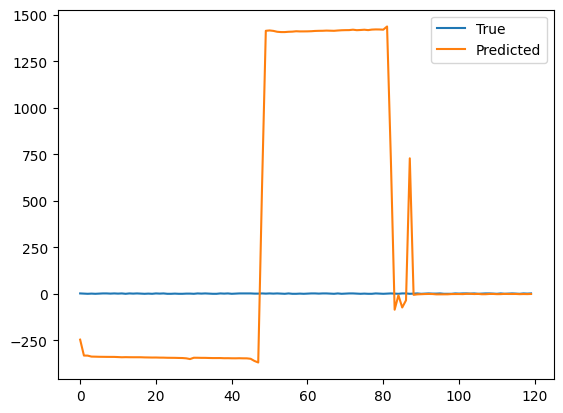

In [70]:
df = pd.read_csv('./lstm 학습 데이터.csv', encoding='euc-kr')
data = df.copy()
data = data[['시가','고가','저가','종가','거래량','SMA5','SMA20','UPPER','MAVG','LOWER','RSI','MACD','AROONUP','AROONDN','NEWS','LABEL']]
data['LABEL'] = data['LABEL'].astype('int64')
# mms = MinMaxScaler()
# mms.fit(data)
# mmsResult = mms.transform(data)
# dataCh = pd.DataFrame(columns=data.columns, data=mmsResult)
X = np.array(data[['시가','고가','저가','종가','거래량','SMA5','SMA20','UPPER','MAVG','LOWER','RSI','MACD','AROONUP','AROONDN','NEWS']][:1000])
y = np.array(data['LABEL'][:1000])

# 데이터 분할 (학습 데이터와 테스트 데이터)
train_size = int(len(X) * 0.88)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(15, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
modelpath="./lstm.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델 학습
model.fit(X_train, y_train, validation_split=0.25, epochs=10, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)

# 예측 결과 시각화
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [71]:
y_test

array([2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0,
       1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       0, 2, 0, 1, 2, 1, 0, 2, 1, 2], dtype=int64)

In [87]:
y_pred[118][0]

-1.633449

In [10]:
# window_size는 LSTM 모델에서 사용되는 입력 윈도우(window)의 크기를 의미합니다.

# LSTM 모델은 순차적인 데이터를 다루기 위해 시계열 데이터를 고려합니다.
# 입력 데이터를 이전의 연속된 값을 포함하는 윈도우로 구성하여 모델에 입력으로 제공합니다.
# window_size는 이 윈도우의 크기를 결정합니다.

# 예를 들어, window_size가 10이라면, LSTM 모델은 각각의 입력 시점에서 이전 10개의
# 연속된 값을 입력으로 받습니다. 이전 10개의 값은 시계열 데이터의 특정 구간을 나타내며,
# 모델은 이를 바탕으로 다음 값을 예측하게 됩니다.

# window_size의 선택은 데이터의 특성과 예측하고자 하는 시간 단위에 따라 달라질 수 있습니다.
# 작은 window_size는 더 짧은 기간의 패턴을 고려하고 예측을 수행하지만, 장기적인 패턴을 놓칠 수 있습니다.
# 큰 window_size는 더 장기적인 패턴을 고려할 수 있지만, 더 많은 데이터를 필요로 하며 모델의 복잡성이 증가할 수 있습니다.

# 적절한 window_size를 선택하기 위해서는 데이터의 특성과 문제의 복잡도를 고려하며,
# 실험과 조정을 통해 최적의 크기를 찾아내는 것이 일반적입니다.